In [1]:
import open3d as o3d
import os
import glob

In [2]:
from model import PointNetCls

import torch.utils.data as data
import torch
import numpy as np
import sys
import torchvision.transforms as transforms
import argparse
import json
import random
from random import randrange
from IPython.display import clear_output
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

# mesh

In [3]:
classifier1 = PointNetCls(k=8)

if torch.cuda.is_available():
    classifier1.cuda()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classifier1 = nn.DataParallel(classifier1).to(device)
classifier1.load_state_dict(torch.load(''))

classifier1.eval()

DataParallel(
  (module): PointNetCls(
    (feat): PointNetfeat(
      (stn): STN3d(
        (conv1): Conv1d(3, 64, kernel_size=(1,), stride=(1,))
        (conv2): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
        (conv3): Conv1d(128, 1024, kernel_size=(1,), stride=(1,))
        (fc1): Linear(in_features=1024, out_features=512, bias=True)
        (fc2): Linear(in_features=512, out_features=256, bias=True)
        (fc3): Linear(in_features=256, out_features=9, bias=True)
        (relu): ReLU()
        (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bn3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bn4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bn5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (co

# pcd

In [4]:
classifier2 = PointNetCls(k=8)

if torch.cuda.is_available():
    classifier2.cuda()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classifier2 = nn.DataParallel(classifier2).to(device)
classifier2.load_state_dict(torch.load(''))

classifier2.eval()

DataParallel(
  (module): PointNetCls(
    (feat): PointNetfeat(
      (stn): STN3d(
        (conv1): Conv1d(3, 64, kernel_size=(1,), stride=(1,))
        (conv2): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
        (conv3): Conv1d(128, 1024, kernel_size=(1,), stride=(1,))
        (fc1): Linear(in_features=1024, out_features=512, bias=True)
        (fc2): Linear(in_features=512, out_features=256, bias=True)
        (fc3): Linear(in_features=256, out_features=9, bias=True)
        (relu): ReLU()
        (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bn3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bn4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bn5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (co

In [4]:
# !pip install torchsummary
# !pip install pytorch_model_summary
# !pip install torchinfo

In [5]:
from torchinfo import summary
batch_size = 32
summary(classifier, input_size=(batch_size,3,1024))

Layer (type:depth-idx)                   Output Shape              Param #
DataParallel                             [32, 8]                   --
├─PointNetCls: 1-1                       [32, 8]                   --
│    └─PointNetfeat: 2-1                 [32, 1024]                --
│    │    └─STN3d: 3-1                   [32, 3, 3]                803,081
│    │    └─Conv1d: 3-2                  [32, 64, 1024]            256
│    │    └─BatchNorm1d: 3-3             [32, 64, 1024]            128
│    │    └─Conv1d: 3-4                  [32, 128, 1024]           8,320
│    │    └─BatchNorm1d: 3-5             [32, 128, 1024]           256
│    │    └─Conv1d: 3-6                  [32, 1024, 1024]          132,096
│    │    └─BatchNorm1d: 3-7             [32, 1024, 1024]          2,048
│    └─Linear: 2-2                       [32, 512]                 524,800
│    └─BatchNorm1d: 2-3                  [32, 512]                 1,024
│    └─Linear: 2-4                       [32, 256]        

In [5]:
model_children1 = list(classifier1.children())
children_children1 = list(model_children1[0].children())
model_children2 = list(classifier2.children())
children_children2 = list(model_children2[0].children())

In [6]:
print(len(model_children1))
print(len(children_children1))
print(children_children1)

1
8
[PointNetfeat(
  (stn): STN3d(
    (conv1): Conv1d(3, 64, kernel_size=(1,), stride=(1,))
    (conv2): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
    (conv3): Conv1d(128, 1024, kernel_size=(1,), stride=(1,))
    (fc1): Linear(in_features=1024, out_features=512, bias=True)
    (fc2): Linear(in_features=512, out_features=256, bias=True)
    (fc3): Linear(in_features=256, out_features=9, bias=True)
    (relu): ReLU()
    (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv1): Conv1d(3, 64, kernel_size=(1,), stride=(1,))
  (conv2): Conv1d(64, 128, kernel_size=(1,), stride=(1,

In [7]:
children_children1[1]
children_children2[1]

Linear(in_features=1024, out_features=512, bias=True)

In [8]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        # print("=======output=======")
        # print(output)
        # print("=======output len=======")
        # print(len(output))
        # print("=======output[0] len=======")
        # print(len(output[0]))
        # print("=======output[1] len=======")
        # print(len(output[1]))
        activation[name] = input[0].detach()
    return hook

In [9]:
children_children1[1].register_forward_hook(get_activation('1024_1'))
children_children2[1].register_forward_hook(get_activation('1024_2'))

In [10]:
class MeshDataset(data.Dataset):
    def __init__(self, root, npoints=1024, classification=True, train=True):
        self.npoints = npoints
        self.root = root
        self.catfile = "" # Your Data Path
        self.cat = {}

        self.classification = classification
        # cnt = 0
        for item in os.listdir(self.catfile):
            self.cat[item] = item
            # cnt += 1
        # print(self.cat)
        # print()

        self.meta = {}
        for item in self.cat:
            # print(item)
            # print()
            self.meta[item] = []
            # print(self.meta)
            # print()
            dir_mesh = os.path.join(self.root, self.cat[item])
            # print(dir_mesh)
            # print()
            fns = glob.glob(os.path.join(dir_mesh, "*.obj"))
            random.seed("2022-10-29")
            random.shuffle(fns)
            # print(fns)
            # print()
            if train:
                fns = fns[-int(len(fns) * 0.8) :]  # train_plist
            else:
                fns = fns[: -int(len(fns) * 0.8)]  # valid_plist

            # print(f"train : {len(train_plist)}")
            # print(f"valid : {len(valid_plist)}")

            # print(os.path.basename(fns))
            for fn in fns:
                token = os.path.splitext(fn)[0]
                self.meta[item].append((os.path.join(dir_mesh, token + ".obj"), item))

            # print(self.meta)
            # print()
            # break
        # print("==================================================")
        # print("self.meta\n", self.meta)
        # print()
        self.datapath = []
        for item in self.cat:
            for fn in self.meta[item]:
                # print(fn)
                # print(fn[0])
                self.datapath.append((item, fn[0], fn[1]))
            # break
        # print("self.datapath\n", self.datapath)
        # print("=======================================================")
        # print()
        self.classes = dict(zip(sorted(self.cat), range(len(self.cat))))
        # print("self.classes\n", self.classes)
        # print()
        # self.num_classes = 0
        # if not self.classification:
        #     for i in range(len(self.datapath) // 50):
        #         l = len(np.unique(np.loadtxt(self.datapath[i][-1]).astype(np.uint8)))
        #         if l > self.num_seg_classes:
        #             self.num_seg_classes = l

    def __getitem__(self, index):
        fn = self.datapath[index]
        # print(fn)
        # print(fn[0], fn[1], fn[2])
        # print(self.classes)
        cls = self.classes[self.datapath[index][0]]
        # print(cls)
        mesh = o3d.io.read_triangle_mesh(fn[1])
        # print(mesh)
        mesh.compute_vertex_normals()
        # print(mesh)
        pcd = mesh.sample_points_uniformly(number_of_points=self.npoints)
        # print(pcd)
        point_set = np.asarray(pcd.points, dtype=np.float32)
        # seg = np.loadtxt(fn[2]).astype(np.int64)
        # print(point_set.shape)

        # choice = np.random.choice(len(seg), self.npoints, replace=True)
        # resample
        # point_set = point_set[choice, :]
        # seg = seg[choice]
        point_set = torch.from_numpy(point_set)
        # seg = torch.from_numpy(seg)
        cls = torch.from_numpy(np.array([cls]).astype(np.int64))
        if self.classification:
            return point_set, cls
        # else:
        #    return point_set, seg

    def __len__(self):
        return len(self.datapath)

In [11]:
class PcdDataset(data.Dataset):
    def __init__(self, root, npoints = 1024, classification = True, state = 0):
        self.root = root
        self.npoints = npoints
        self.catfile = "" # Your Data Path
        self.cat = {}

        self.classification = classification

        for item in os.listdir(self.catfile):
            self.cat[item] = item

        self.meta = {}
        for item in self.cat:
            self.meta[item] = []
            dir_pcd = os.path.join(self.root, self.cat[item])
            fns = glob.glob(os.path.join(dir_pcd,"*.pcd"))
            random.seed("2022-10-29")
            random.shuffle(fns)
            if state == 0: # train 0.6
                fns = fns[:int(len(fns)*0.6)]
            elif state == 1: # valid 0.2
                fns = fns[int(len(fns)*0.6):int(len(fns)*0.8)]
            else: # test 0.2
                fns = fns[int(len(fns)*0.8):]

            for fn in fns:
                token = os.path.splitext(fn)[0]
                self.meta[item].append((os.path.join(dir_pcd,token+".pcd"),item))
        
        self.datapath = []
        for item in self.cat:
            for fn in self.meta[item]:
                self.datapath.append((item, fn[0], fn[1]))
        
        self.classes = dict(zip(sorted(self.cat),range(len(self.cat))))
    
    def __getitem__(self, index):
        fn = self.datapath[index]
        cls = self.classes[self.datapath[index][0]]
        pcd = o3d.io.read_point_cloud(fn[1])
        point_set = np.asarray(pcd.points, dtype=np.float32)
        choice = np.random.choice(len(point_set), self.npoints, replace=True)
        point_set = point_set[choice, :]
        point_set = torch.from_numpy(point_set)
        cls = torch.from_numpy(np.array([cls]).astype(np.int64))
        if self.classification:
            return point_set, cls

    def __len__(self):
        return len(self.datapath)

In [12]:
mesh_path = "" # Your Data Path

train_dataset1 = MeshDataset(
    root=mesh_path, classification=True, npoints=2048
)

train_dataset2 = PcdDataset(
    root=mesh_path, classification=True, npoints=2048, state=0
)
# valid_dataset = MeshDataset(
#     root=mesh_path, train=False, classification=True, npoints=2048
# )

batch_size = 32

dataloader1 = torch.utils.data.DataLoader(
    train_dataset1, batch_size=batch_size, shuffle=True
)
dataloader2 = torch.utils.data.DataLoader(
    train_dataset2, batch_size=batch_size, shuffle=True
)
# valloader = torch.utils.data.DataLoader(
#     valid_dataset, batch_size=batch_size, shuffle=True
# )

In [ ]:
feature_vector1 = []
label_vector1 = []
for epoch in range(1):
    idx = 0
    with torch.no_grad():
        for data in dataloader1:
        #for data in test_loader:    
            points, label = data
            label = label[:, 0]
            points = points.transpose(2, 1)
            points, label = points.to(device), label.to(device)
            classifier1 = classifier1.train()
            result = classifier1(points)
            idx = idx + 1
            print("====label====")
            print(len(label))
            print(label.shape)
            label_vector1.append(label)
            print("====activation['1024_1']====")
            print(activation['1024_1'])
            print(len(activation['1024_1']))
            print(activation['1024_1'].shape)
            feature_vector1.append(activation['1024_1'])
            # print("====activation['1024_2']====")
            # print(activation['1024_2'])
            # print(len(activation['1024_2']))
            # print(activation['1024_2'].shape)
            # feature_vector2.append(activation['1024_2'])

In [ ]:
feature_vector2 = []
label_vector2 = []
for epoch in range(1):
    idx = 0
    with torch.no_grad():
        for data in dataloader2:
        #for data in test_loader:    
            points, label = data
            label = label[:, 0]
            points = points.transpose(2, 1)
            points, label = points.to(device), label.to(device)
            classifier2 = classifier2.train()
            result = classifier2(points)
            idx = idx + 1
            print("====label====")
            print(len(label))
            print(label.shape)
            label_vector2.append(label)
            print("====activation['1024_2']====")
            print(activation['1024_2'])
            print(len(activation['1024_2']))
            print(activation['1024_2'].shape)
            feature_vector2.append(activation['1024_2'])

In [15]:
for i in range(1,len(feature_vector1)):
    feature_vector1[0] = torch.cat([feature_vector1[0],feature_vector1[i]],dim=0)
for i in range(1,len(feature_vector2)):
    feature_vector2[0] = torch.cat([feature_vector2[0],feature_vector2[i]],dim=0)

In [16]:
for i in range(1,len(label_vector1)):
    label_vector1[0] = torch.cat([label_vector1[0],label_vector1[i]],dim=0)
for i in range(1,len(label_vector2)):
    label_vector2[0] = torch.cat([label_vector2[0],label_vector2[i]],dim=0)

In [17]:
int(label_vector2[0][2])

1

In [18]:
# 같은 클래스 확인 용
for i in range(len(label_vector2[0])):
    if int(label_vector2[0][i]) == 0:
        label_vector2[0][i] = 8
    elif int(label_vector2[0][i]) == 1:
        label_vector2[0][i] = 9
    elif int(label_vector2[0][i]) == 2:
        label_vector2[0][i] = 10
    elif int(label_vector2[0][i]) == 3:
        label_vector2[0][i] = 11
    elif int(label_vector2[0][i]) == 4:
        label_vector2[0][i] = 12
    elif int(label_vector2[0][i]) == 5:
        label_vector2[0][i] = 13
    elif int(label_vector2[0][i]) == 6:
        label_vector2[0][i] = 14
    elif int(label_vector2[0][i]) == 7:
        label_vector2[0][i] = 15

In [19]:
print(feature_vector1[0].shape)
print(label_vector1[0].shape)
print(feature_vector2[0].shape)
print(label_vector2[0].shape)

torch.Size([3196, 1024])
torch.Size([3196])
torch.Size([2326, 1024])
torch.Size([2326])


In [20]:
source_vector = torch.zeros(len(label_vector1[0])) 
target_vector = torch.ones(len(label_vector2[0]))

In [21]:
print(source_vector.shape)

torch.Size([3196])


In [22]:
feature_vector = torch.cat([feature_vector1[0],feature_vector2[0]],dim=0)
label_vector = torch.cat([label_vector1[0],label_vector2[0]],dim=0)
domain_vector = torch.cat([source_vector,target_vector],dim=0)

In [ ]:
domain_vector.shape

torch.Size([5522])

In [ ]:
features = [feature_vector1[0], label_vector[0]]

In [23]:
features = [feature_vector, label_vector, domain_vector]

In [28]:
features

[tensor([[-0.8842, -0.0057,  0.7417,  ...,  1.8144,  0.7437,  0.7819],
         [ 1.2976,  1.4576,  0.3311,  ...,  1.0418, -0.3050, -0.6633],
         [ 0.3318,  0.5393,  0.5213,  ...,  1.2350,  1.2137,  0.2854],
         ...,
         [ 1.3940,  1.3016,  1.6351,  ...,  0.1061,  1.0841,  0.1350],
         [ 0.8451, -0.1729,  1.4809,  ..., -1.1674, -0.1673, -1.0886],
         [ 1.7290,  0.7216,  1.6861,  ...,  0.7255,  0.9963,  0.8064]],
        device='cuda:0'),
 tensor([ 6,  7,  7,  ..., 15,  9,  9], device='cuda:0'),
 tensor([0., 0., 0.,  ..., 1., 1., 1.])]

In [24]:
features[0], features[1] = features[0].cpu(), features[1].cpu()

In [35]:
features

[tensor([[-0.4598,  0.2861,  1.4102,  ...,  2.1368,  1.4632,  1.2397],
         [ 0.3614,  1.3872,  0.3236,  ...,  3.3327,  1.2577,  0.0795],
         [ 0.9580,  0.6796,  0.5480,  ..., -0.3493,  0.1330, -0.1694],
         ...,
         [ 0.0142,  1.0281,  0.3530,  ...,  0.9490,  2.2463,  0.9107],
         [ 1.1259,  1.4571,  1.6757,  ...,  0.1998,  1.5869,  0.2420],
         [ 0.7528,  0.3172,  1.4900,  ...,  0.0660, -0.3886,  0.3795]]),
 tensor([0., 0., 0.,  ..., 1., 1., 1.])]

In [25]:
from sklearn.manifold import TSNE

In [26]:
tsne = TSNE(n_components=3, n_iter = 20000, learning_rate='auto')

In [27]:
feat_result = tsne.fit_transform(features[0])

c:\Users\user\miniconda3\envs\open3d\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [28]:
# # scale and move the coordinates so they fit [0; 1] range
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))
 
    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)
 
    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range
 
# extract x and y coordinates representing the positions of the images on T-SNE plot
tx = feat_result[:,0]
ty = feat_result[:,1]
tz = feat_result[:,2]
 
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)
tz = scale_to_01_range(tz)

In [29]:
from matplotlib import animation

In [36]:
colors_per_class1 = {
        0 : [254, 11, 33],
        1 : [11, 33, 254]
}

In [31]:
colors_per_class2 = {
        0 : [254, 202, 87],
        1 : [255, 107, 107],
        2 : [10, 189, 227],
        3 : [255, 159, 243],
        4 : [16, 172, 132],
        5 : [128, 80, 128],
        6 : [155, 200, 111],
        7 : [50, 150, 250],
        8 : [254, 202, 87],
        9 : [255, 107, 107],
        10 : [10, 189, 227],
        11 : [255, 159, 243],
        12 : [16, 172, 132],
        13 : [128, 80, 128],
        14 : [155, 200, 111],
        15 : [50, 150, 250]
    }

C:\Users\user\AppData\Local\Temp\ipykernel_14368\1474540978.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  color = np.array(colors_per_class1[label], dtype=np.float) / 255
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please

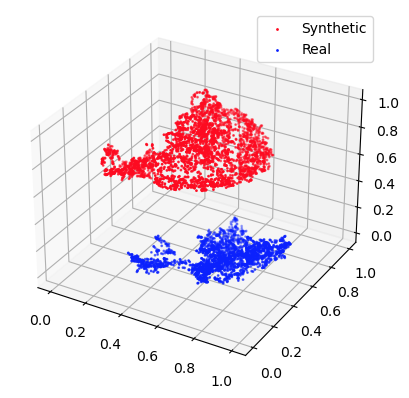

In [37]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# for every class, we'll add a scatter plot separately
for label in colors_per_class1:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(features[2]) if l == label]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    current_tz = np.take(tz, indices)
 
    # convert the class color to matplotlib format
    color = np.array(colors_per_class1[label], dtype=np.float) / 255
    
   
    # add a scatter plot with the corresponding color and label
    clabel = ['Synthetic','Real']
    ax.scatter(current_tx, current_ty, current_tz, c=color, label=clabel[label], s=1)
 
# build a legend using the labels we set previously
ax.legend(loc='best')
 
# finally, show the plot
plt.show()

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=500)
ani.save('D:\\indoor3d_data\\params\\domain_feature_tsne_3d.gif', writer=animation.PillowWriter(fps=30))

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
# for every class, we'll add a scatter plot separately
for label in colors_per_class2:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(features[1]) if l == label]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    current_tz = np.take(tz, indices)
 
    # convert the class color to matplotlib format
    color = np.array(colors_per_class2[label], dtype=np.float) / 255
    
    clabel = ['Syn_Bed','Syn_Chair','Syn_Desk','Syn_Fitness','Syn_Partition','Syn_Sofa','Syn_Closet','Syn_Table',
    'Real_Bed','Real_Chair','Real_Desk','Real_Fitness','Real_Partition','Real_Sofa','Real_Closet','Real_Table']
    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, current_tz, c=color, label=clabel[label], s=1)
 
# build a legend using the labels we set previously
ax.legend(loc=1,bbox_to_anchor=(1.3,1))
 
# finally, show the plot
plt.show()

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=500)
ani.save('D:\\indoor3d_data\\params\\class_feature_tsne_3d.gif', writer=animation.PillowWriter(fps=30))

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# for every class, we'll add a scatter plot separately
for label in colors_per_class:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(features[1]) if l == label]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    current_tz = np.take(tz, indices)
 
    # convert the class color to matplotlib format
    color = np.array(colors_per_class[label], dtype=np.float) / 255
    
    ## 추가 코드
    if label == 0:
    # add a scatter plot with the corresponding color and label
        ax.scatter(current_tx, current_ty, current_tz, c=color, label=label, s=1)
 
# build a legend using the labels we set previously
ax.legend(loc='best')
 
# finally, show the plot
plt.show()

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=500)
ani.save('D:\\indoor3d_data\\params\\pcd\\mesh_train_feature_tsne0.gif', writer=animation.PillowWriter(fps=30))

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# for every class, we'll add a scatter plot separately
for label in colors_per_class:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(features[1]) if l == label]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    current_tz = np.take(tz, indices)
 
    # convert the class color to matplotlib format
    color = np.array(colors_per_class[label], dtype=np.float) / 255
    
    ## 추가 코드
    if label == 1:
    # add a scatter plot with the corresponding color and label
        ax.scatter(current_tx, current_ty, current_tz, c=color, label=label, s=1)
 
# build a legend using the labels we set previously
ax.legend(loc='best')
 
# finally, show the plot
plt.show()

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=500)
ani.save('D:\\indoor3d_data\\params\\pcd\\mesh_train_feature_tsne1.gif', writer=animation.PillowWriter(fps=30))

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# for every class, we'll add a scatter plot separately
for label in colors_per_class:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(features[1]) if l == label]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    current_tz = np.take(tz, indices)
 
    # convert the class color to matplotlib format
    color = np.array(colors_per_class[label], dtype=np.float) / 255
    
    ## 추가 코드
    if label == 2:
    # add a scatter plot with the corresponding color and label
        ax.scatter(current_tx, current_ty, current_tz, c=color, label=label, s=1)
 
# build a legend using the labels we set previously
ax.legend(loc='best')
 
# finally, show the plot
plt.show()

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=500)
ani.save('D:\\indoor3d_data\\params\\pcd\\mesh_train_feature_tsne2.gif', writer=animation.PillowWriter(fps=30))

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# for every class, we'll add a scatter plot separately
for label in colors_per_class:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(features[1]) if l == label]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    current_tz = np.take(tz, indices)
 
    # convert the class color to matplotlib format
    color = np.array(colors_per_class[label], dtype=np.float) / 255
    
    ## 추가 코드
    if label == 3:
    # add a scatter plot with the corresponding color and label
        ax.scatter(current_tx, current_ty, current_tz, c=color, label=label, s=1)
 
# build a legend using the labels we set previously
ax.legend(loc='best')
 
# finally, show the plot
plt.show()

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=500)
ani.save('D:\\indoor3d_data\\params\\pcd\\mesh_train_feature_tsne3.gif', writer=animation.PillowWriter(fps=30))

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# for every class, we'll add a scatter plot separately
for label in colors_per_class:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(features[1]) if l == label]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    current_tz = np.take(tz, indices)
 
    # convert the class color to matplotlib format
    color = np.array(colors_per_class[label], dtype=np.float) / 255
    
    ## 추가 코드
    if label == 4:
    # add a scatter plot with the corresponding color and label
        ax.scatter(current_tx, current_ty, current_tz, c=color, label=label, s=1)
 
# build a legend using the labels we set previously
ax.legend(loc='best')
 
# finally, show the plot
plt.show()

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=500)
ani.save('D:\\indoor3d_data\\params\\pcd\\mesh_train_feature_tsne4.gif', writer=animation.PillowWriter(fps=30))

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# for every class, we'll add a scatter plot separately
for label in colors_per_class:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(features[1]) if l == label]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    current_tz = np.take(tz, indices)
 
    # convert the class color to matplotlib format
    color = np.array(colors_per_class[label], dtype=np.float) / 255
    
    ## 추가 코드
    if label == 5:
    # add a scatter plot with the corresponding color and label
        ax.scatter(current_tx, current_ty, current_tz, c=color, label=label, s=1)
 
# build a legend using the labels we set previously
ax.legend(loc='best')
 
# finally, show the plot
plt.show()

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=500)
ani.save('D:\\indoor3d_data\\params\\pcd\\mesh_train_feature_tsne5.gif', writer=animation.PillowWriter(fps=30))

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# for every class, we'll add a scatter plot separately
for label in colors_per_class:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(features[1]) if l == label]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    current_tz = np.take(tz, indices)
 
    # convert the class color to matplotlib format
    color = np.array(colors_per_class[label], dtype=np.float) / 255
    
    ## 추가 코드
    if label == 6:
    # add a scatter plot with the corresponding color and label
        ax.scatter(current_tx, current_ty, current_tz, c=color, label=label, s=1)
 
# build a legend using the labels we set previously
ax.legend(loc='best')
 
# finally, show the plot
plt.show()

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=500)
ani.save('D:\\indoor3d_data\\params\\pcd\\mesh_train_feature_tsne6.gif', writer=animation.PillowWriter(fps=30))

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# for every class, we'll add a scatter plot separately
for label in colors_per_class:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(features[1]) if l == label]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    current_tz = np.take(tz, indices)
 
    # convert the class color to matplotlib format
    color = np.array(colors_per_class[label], dtype=np.float) / 255
    
    ## 추가 코드
    if label == 7:
    # add a scatter plot with the corresponding color and label
        ax.scatter(current_tx, current_ty, current_tz, c=color, label=label, s=1)
 
# build a legend using the labels we set previously
ax.legend(loc='best')
 
# finally, show the plot
plt.show()

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=500)
ani.save('D:\\indoor3d_data\\params\\pcd\\mesh_train_feature_tsne7.gif', writer=animation.PillowWriter(fps=30))

In [46]:
tsne2 = TSNE(n_components=2, n_iter = 20000, learning_rate='auto')
feat_result2 = tsne2.fit_transform(features[0])

c:\Users\user\miniconda3\envs\open3d\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [47]:
# scale and move the coordinates so they fit [0; 1] range
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))
 
    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)
 
    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range
 
# extract x and y coordinates representing the positions of the images on T-SNE plot
tx = feat_result2[:, 0]
ty = feat_result2[:, 1]
 
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)

C:\Users\user\AppData\Local\Temp\ipykernel_14368\1414829009.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  color = np.array(colors_per_class2[label], dtype=np.float) / 255
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please

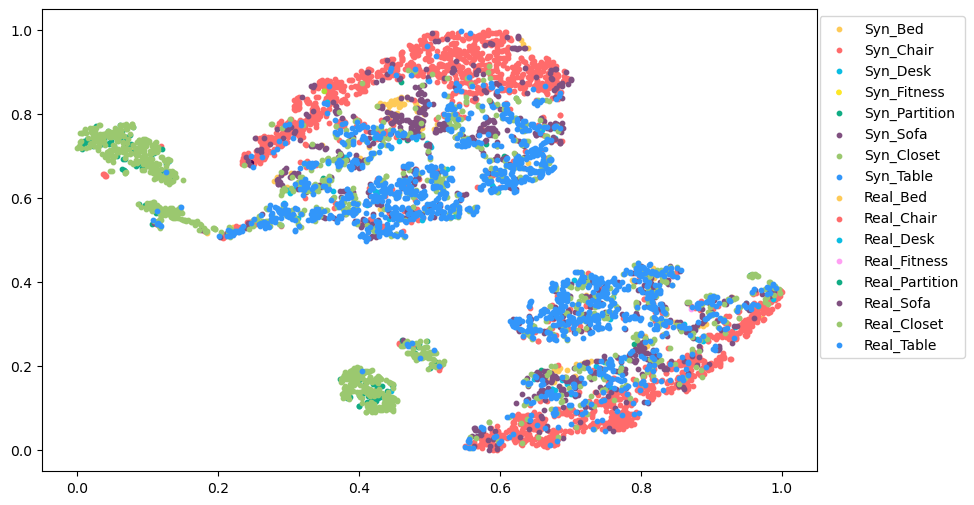

In [66]:
# initialize a matplotlib plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
 
# for every class, we'll add a scatter plot separately
for label in colors_per_class2:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(features[1]) if l == label]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
 
    # convert the class color to matplotlib format
    color = np.array(colors_per_class2[label], dtype=np.float) / 255
    
    # add a scatter plot with the corresponding color and label
    clabel = ['Syn_Bed','Syn_Chair','Syn_Desk','Syn_Fitness','Syn_Partition','Syn_Sofa','Syn_Closet','Syn_Table',
    'Real_Bed','Real_Chair','Real_Desk','Real_Fitness','Real_Partition','Real_Sofa','Real_Closet','Real_Table']
    ax.scatter(current_tx, current_ty, c=color, label=clabel[label], s=10)
 
# build a legend using the labels we set previously
ax.legend(loc=1,bbox_to_anchor=(1.2,1))
plt.savefig('D:\\indoor3d_data\\params\\class_all.png',dpi=200) 
# finally, show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14368\3810227545.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  color = np.array(colors_per_class1[label], dtype=np.float) / 255
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please

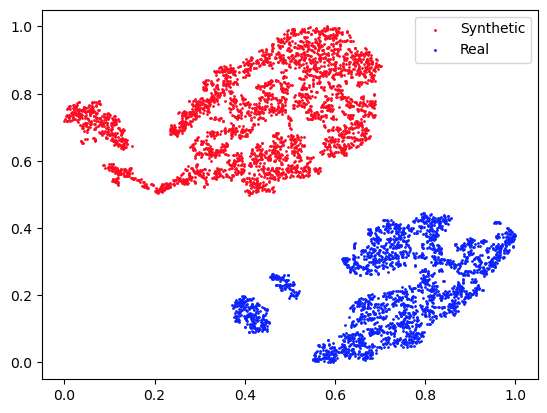

In [62]:
# initialize a matplotlib plot
fig = plt.figure()
ax = fig.add_subplot(111)
 
# for every class, we'll add a scatter plot separately
for label in colors_per_class1:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(features[2]) if l == label]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
 
    # convert the class color to matplotlib format
    color = np.array(colors_per_class1[label], dtype=np.float) / 255
 
    # add a scatter plot with the corresponding color and label
    clabel = ['Synthetic','Real']
    ax.scatter(current_tx, current_ty, c=color, label=clabel[label], s=1)
 
# build a legend using the labels we set previously
ax.legend(loc='best')
plt.savefig('D:\\indoor3d_data\\params\\pcd\\all.png',dpi=200) 
# finally, show the plot
plt.show()

In [ ]:
mesh_path = "" # Your Data Path

test_dataset = PcdDataset(
    root=mesh_path, classification=True, npoints=2048, state=2
)

batch_size = 32

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=True
)

In [ ]:
total_correct = 0
total_testset = 0
for i, data in enumerate(test_loader, 0):
    points, target = data
    target = target[:, 0]
    points = points.transpose(2, 1)
    points, target = points.cuda(), target.cuda()
    classifier = classifier.eval()
    pred, _, _ = classifier(points)
    pred_choice = pred.data.max(1)[1]
    correct = pred_choice.eq(target.data).cpu().sum()
    total_correct += correct.item()
    total_testset += points.size()[0]

print("final accuracy {}".format(total_correct / float(total_testset)))

final accuracy 0.7955493741307371


In [ ]:
save = [[],[],[]] # points, target, pred
for i, data in enumerate(test_loader, 0):
    points, target = data
    target = target[:, 0]
    points = points.transpose(2, 1)
    points, target = points.cuda(), target.cuda()
    classifier = classifier.eval()
    pred, _, _ = classifier(points)
    pred_choice = pred.data.max(1)[1]
    correct = pred_choice.eq(target.data).cpu().sum()
    total_correct += correct.item()
    total_testset += points.size()[0]
    save[0].append(points)
    save[1].append(target)
    save[2].append(pred_choice)

In [ ]:
target = torch.concat(save[1])
pred = torch.concat(save[2])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
target = target.cpu()
pred = pred.cpu()
confusion_matrix = confusion_matrix(target, pred)

In [ ]:
confusion_matrix

array([[ 13,   0,   0,   0,   0,   2,   0,   1],
       [  1, 207,   1,   0,   0,  22,  14,  16],
       [  0,   0,  13,   0,   0,   1,   0,   2],
       [  0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,  11,   0,   7,   0],
       [  4,   5,   0,   0,   0,  89,   3,   5],
       [  0,   2,   0,   0,   1,   6,  83,  15],
       [  0,   7,   4,   0,   0,  12,  23, 148]], dtype=int64)

In [ ]:
import itertools


def plot_confusion_matrix(con_mat, labels, title='confusion_matrix', cmap=plt.cm.get_cmap('Blues'),normalize=False):
    plt.figure(figsize=(15,10))
    plt.imshow(con_mat,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    marks = np.arange(len(labels))
    nlabels = []
    for k in range(len(con_mat)):
        n = sum(con_mat[k])
        nlabel = '{0}(n={1})'.format(labels[k],n)
        nlabels.append(nlabel)
    plt.xticks(marks,labels)
    plt.yticks(marks,nlabels)

    thresh = con_mat.max() / 2.
    if normalize:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, '{0}%'.format(con_mat[i, j] * 100 / n), horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    else:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, con_mat[i, j], horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png', dpi=1000)
    plt.show()

['Bed', 'Chair', 'Desk', 'Fitness equipment', 'Partition', 'Sofa', 'Storage closet', 'Table']


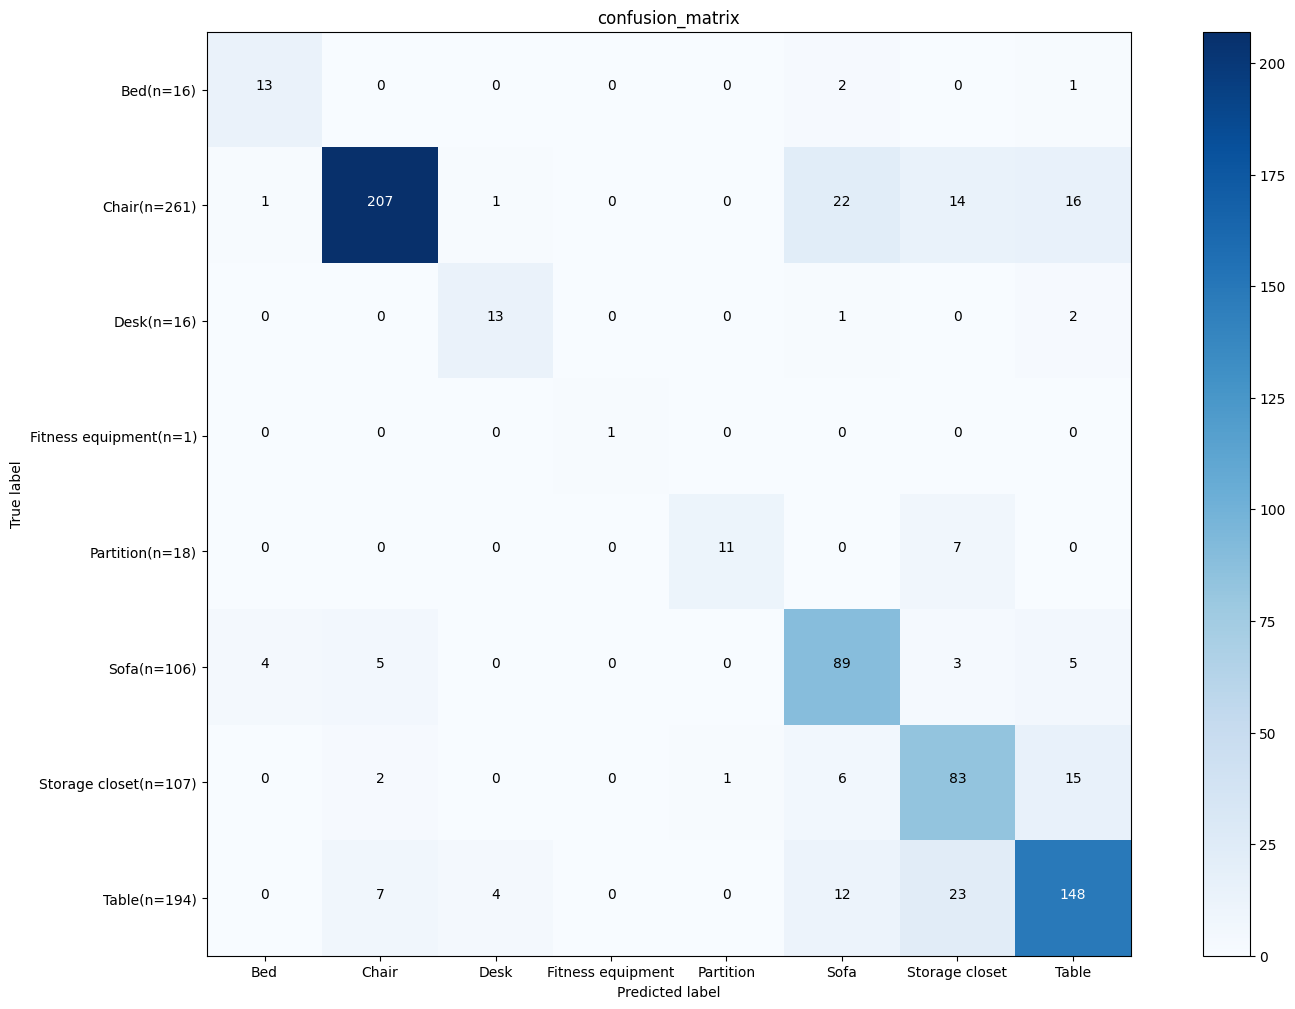

In [ ]:
pcd_path = 'D:\\indoor3d_data\\object_pcd'
classes = os.listdir(pcd_path)
print(classes)
plot_confusion_matrix(confusion_matrix,classes,normalize=False)